# 01_서브플롯

Mapplotlib를 사용하여 하나의 그래픽 영역에 나눈어 두 개 이상의 시각화 결과물을 하나의 화면에 표현 할 수 있다.

## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [1]:
from pandas import read_csv
from matplotlib import pyplot

### 2) 데이터 가져오기
> 데이터 출처 : KOSIS 국가 통계 포탈

In [2]:
교통사고csv = read_csv("traffic.csv", encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 3) 데이터 전처리(년도별 합계 구하기)

In [5]:
교통사고tmp = 교통사고csv.filter(['년도','발생건수','사망자수', '부상자수'])
교통사고df = 교통사고tmp.groupby(['년도']).sum()
교통사고df
df = 교통사고df.copy()
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


### 4) 그래프에 대한 전역 환경 설정 

In [7]:
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 16                # 글자 크기
pyplot.rcParams["figure.figsize"] = (20,10)       # 그래프의 가로, 세로 크기 (inch단위)

## #02. 서브플롯 영역 나누기

### 1) 2행 3열 갖는 서브 플롯 영역 생성하기 

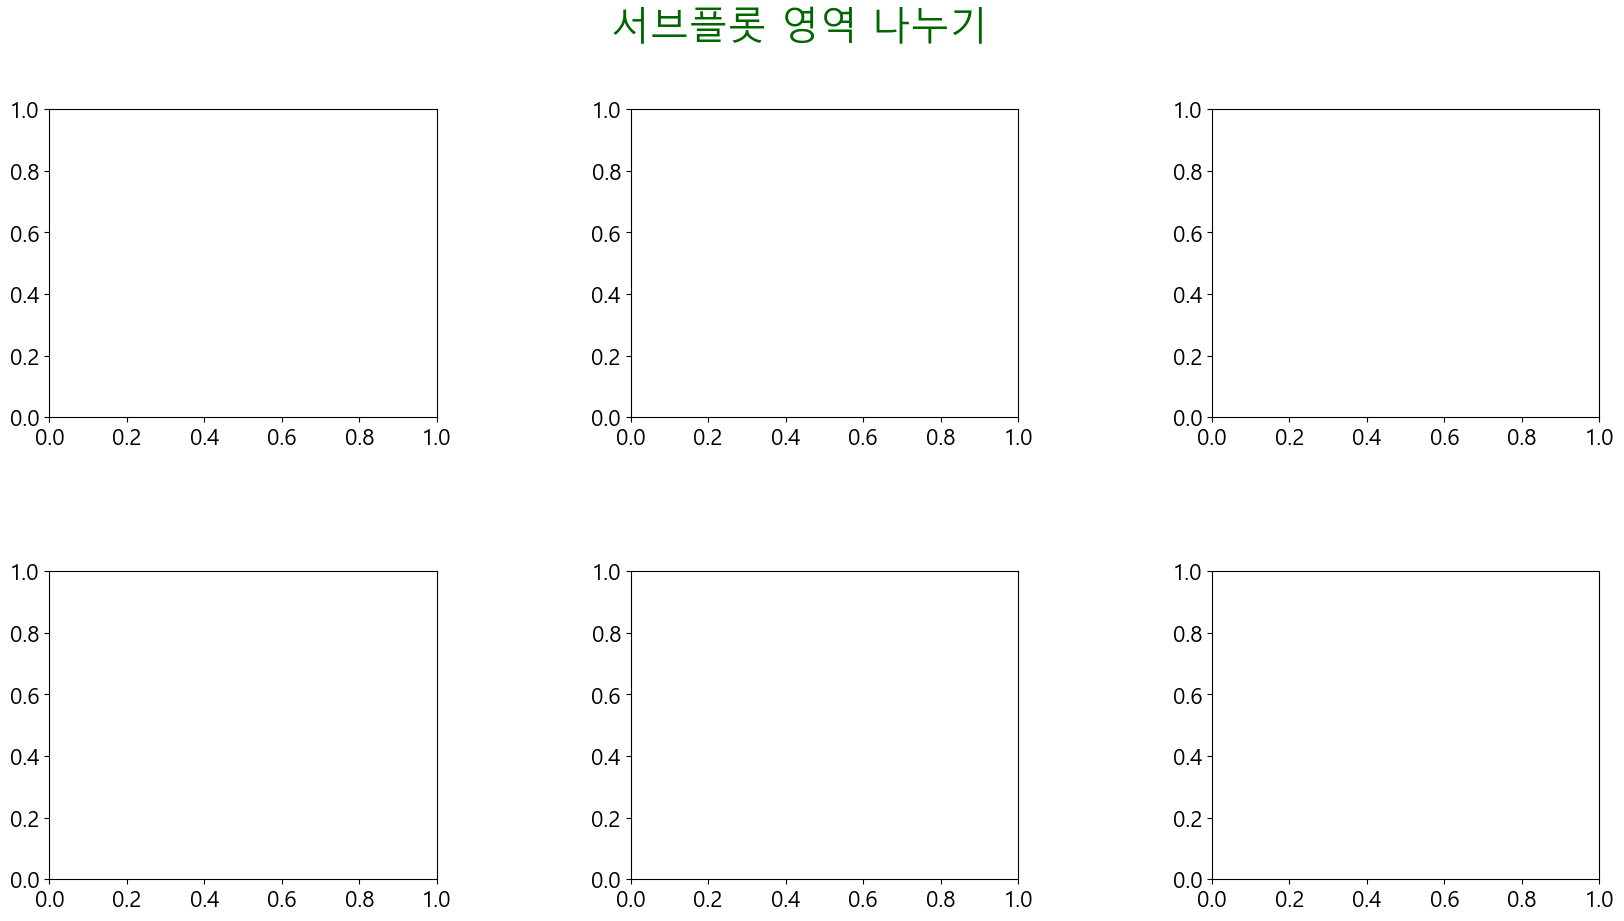

In [10]:
# 영역을 나눌 수 있는 객체 생성
fig = pyplot.figure()

# 전체 제목
fig.suptitle("서브플롯 영역 나누기", fontsize=28, color="#006600")

# 각 그래프 간의 가로, 세로 간격 지정
fig.subplots_adjust(wspace=0.5, hspace=0.5)

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

pyplot.show()

## #03. 상자그림에 대한 서브 플롯

#### `add_subplot()`함수를 통해 리턴 받은 객체 각각의 그래프 생성 함수에게 `ax`파라미터로 지정한다.

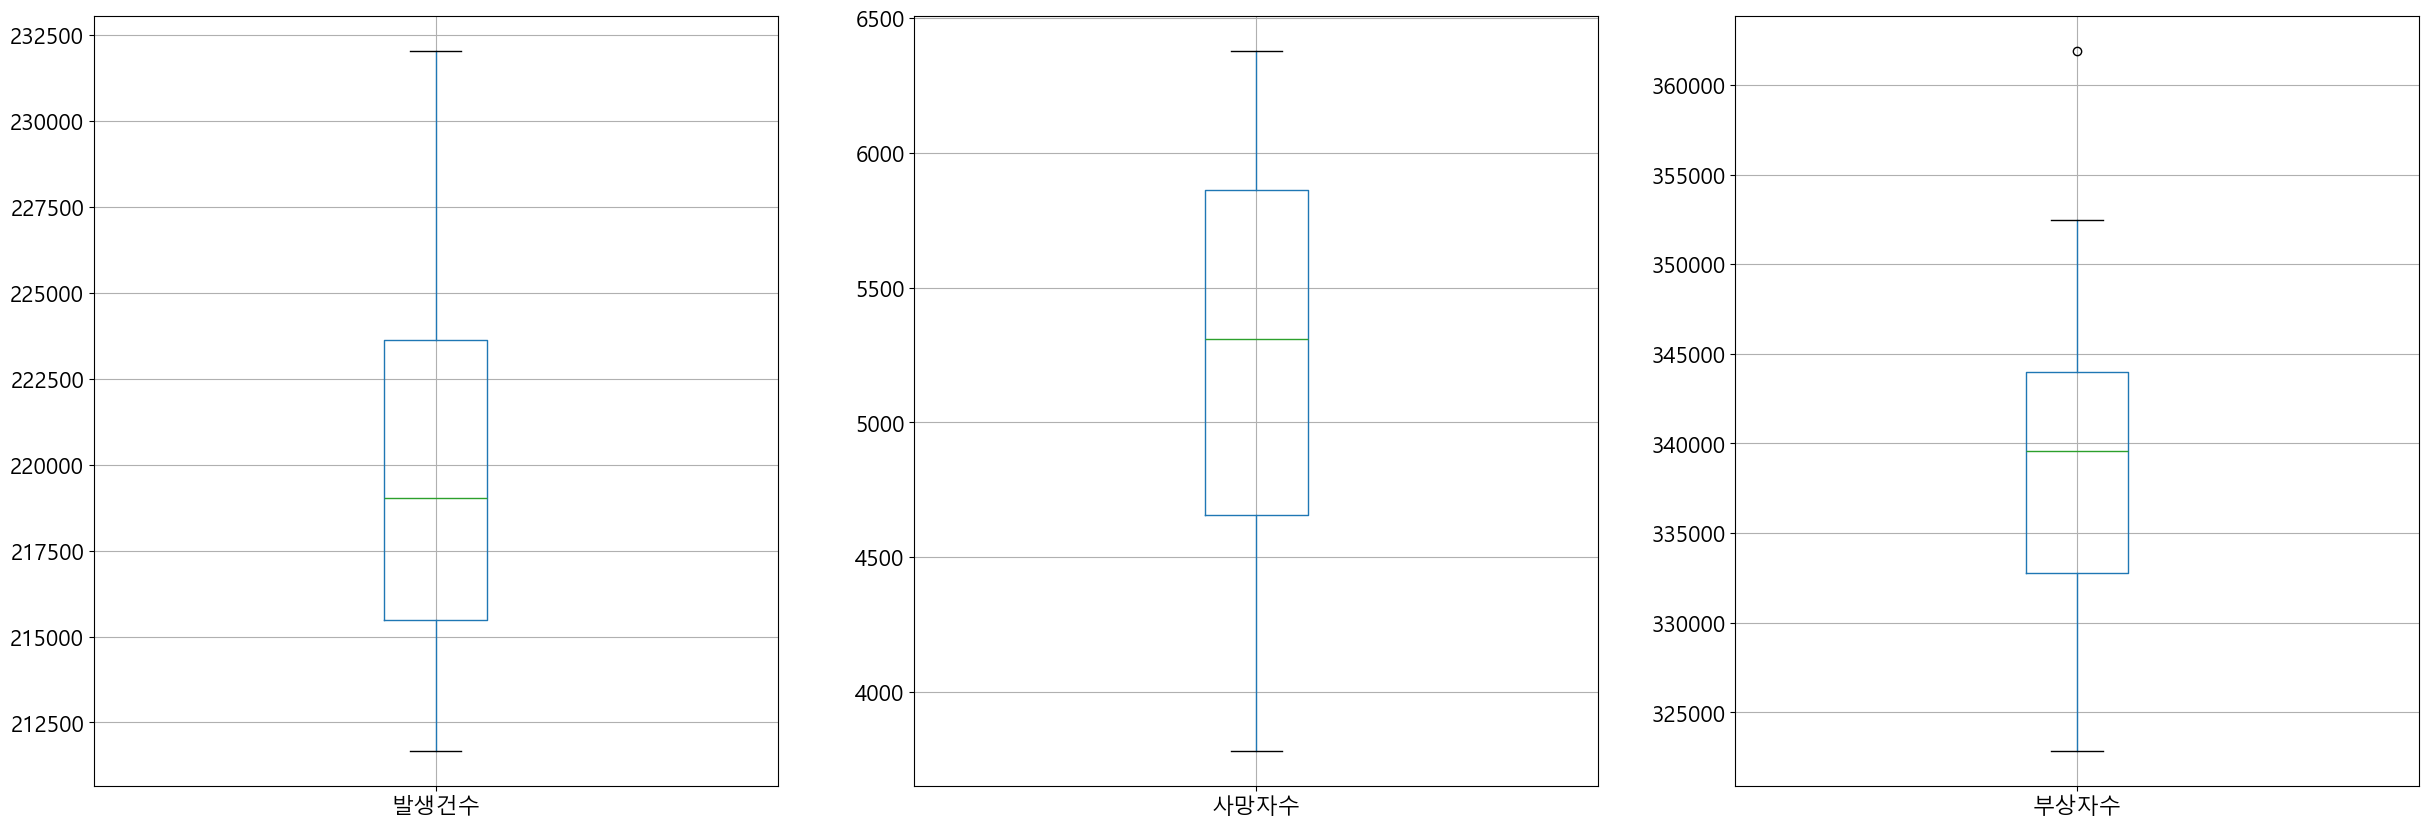

In [11]:
# 그래프 크기 재설정 
pyplot.rcParams["figure.figsize"] =(30,10)

# 객체 생성
fig = pyplot.figure()

# 1행 3열
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 발생 건수, 사망자 수, 부상자 수 를 상자그림에 서브 플롯으로 표시 하자 
df.boxplot(['발생건수'], ax = ax1)
df.boxplot(['사망자수'], ax = ax2)
df.boxplot(['부상자수'], ax = ax3)

pyplot.show()

## #04. 서브플롯에 그래프 그리기

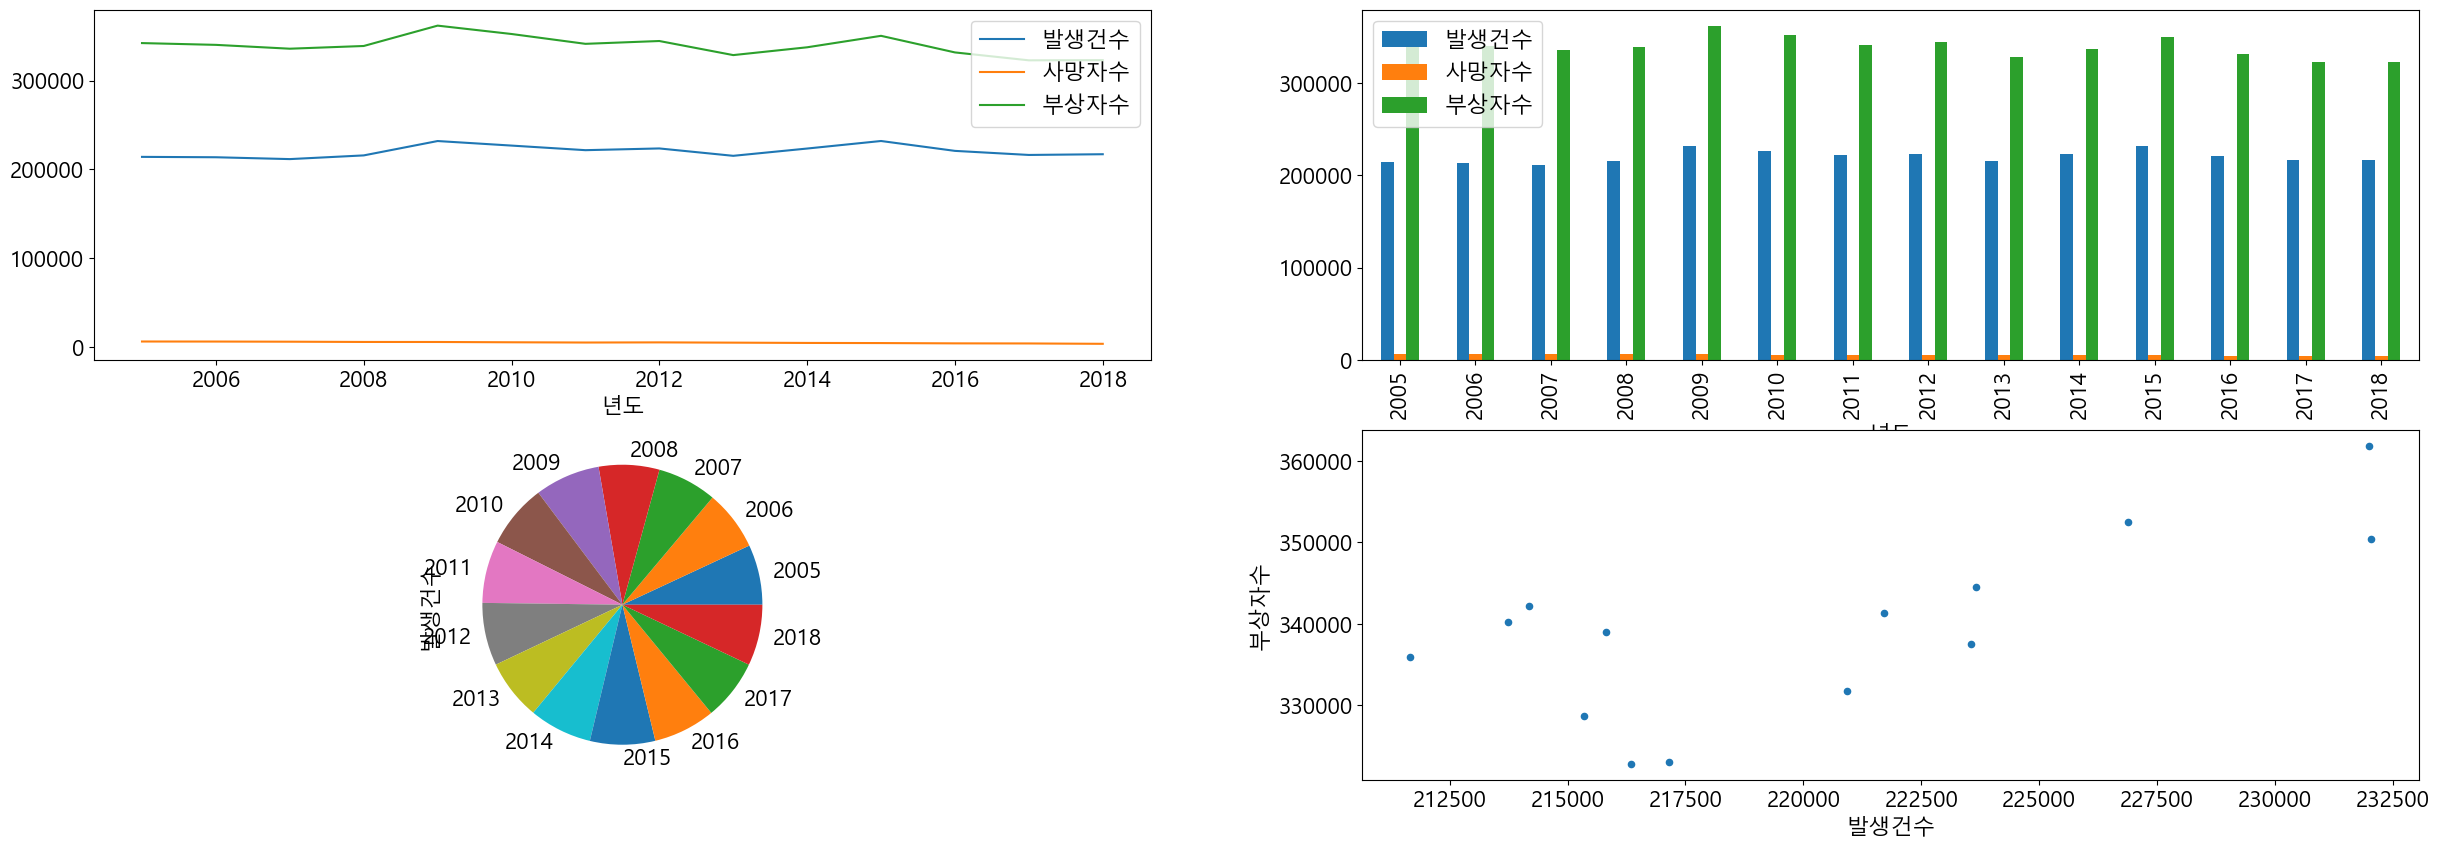

In [12]:
# 그래프 크기 재설정 
pyplot.rcParams["figure.figsize"] =(30,10)

# 객체 생성
fig = pyplot.figure()

# 2행 2열
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 각 영역별로 그래프 넣기 

df.plot(ax=ax1)                  # 선   그래프 
df.plot.bar(ax=ax2)              # 막대 그래프 
df['발생건수'].plot.pie(ax=ax3)  # 파이 그래프
df.plot.scatter(x='발생건수',y='부상자수', ax=ax4)

pyplot.show()

## #05. 서브플롯 영역에 옵션 지정하기

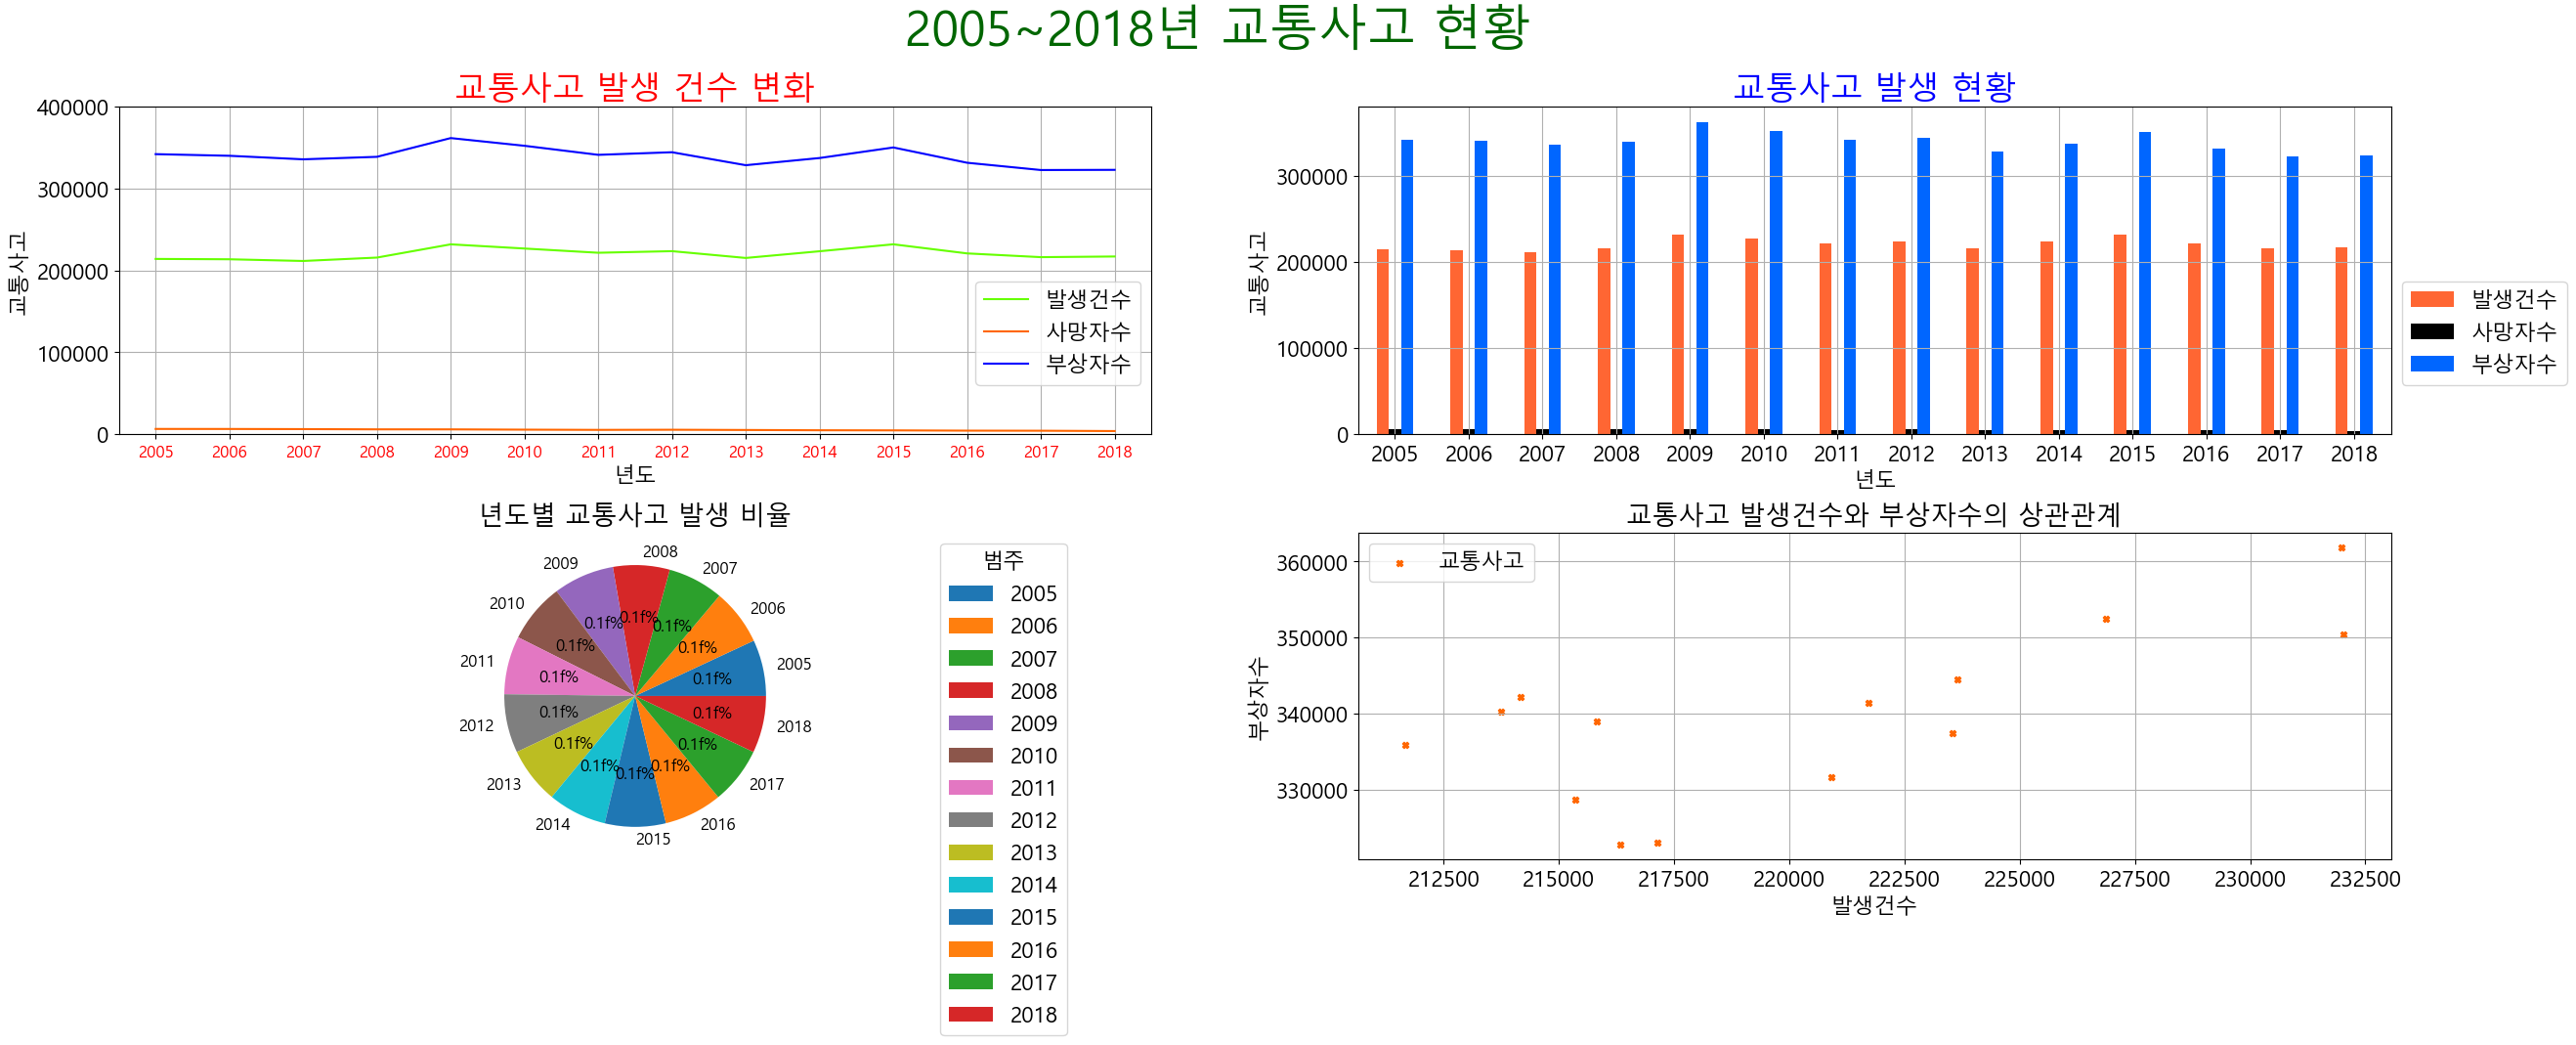

In [19]:
# 그래프 전반적인 환결 재설정 
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 16                # 글자 크기
pyplot.rcParams["figure.figsize"] =(30,10)

# 객체 생성
fig = pyplot.figure()

# 2행 2열
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color="#006600")

# 그래프간의 간격
fig.subplots_adjust(wspace=0.2, hspace=0.3)

#### 첫번째 영역 그래픽 처리
# 선 그래프
df.plot(ax=ax1, color=['#66ff00','#ff6600','#0000ff'])

# 격자표시
ax1.grid()

ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color("#ff0000")

# pyplot을 직접 사용할 경우 xticks(x좌표리스트, 텍스트리스트)형식으로 지정하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
# x축 좌표리스트
start = min(df.index)
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))

# 표시할 텍스트
ax1.set_xticklabels(df.index, fontsize=12, color="#ff0000")

# 레이블 지정
ax1.set(xlabel='년도', ylabel='교통사고')

# x축, y축 범위
ax1.set_xlim(start-0.5, end+0.5)
ax1.set_ylim([0,400000])

ax1.legend(bbox_to_anchor=(1,0.5))

######### 두번째 그래프
# 막대 그래프
df.plot.bar(ax=ax2, rot=0, color=["#ff6633","#000000", "#0066ff"])

ax2.grid()

ax2.title.set_text("교통사고 발생 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color("#0000ff")

# 레이블 지정
ax2.set(xlabel='년도', ylabel='교통사고')
ax2.legend(bbox_to_anchor=(1,0.5))

#-------------------------------
# 세 번째 영역 그래프 표시 
#-------------------------------
# 파이 그래프
교통사고df['발생건수'].plot.pie(ax=ax3, labels=교통사고df.index,
autopct="0.1f%%", textprops={'color':"#000000", 'fontsize':12})

# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생 비율")

# 격자 표시 -> 파이 그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=교통사고df.index, title='범주', bbox_to_anchor=(1.4,1))
#-------------------------------
# 네 번째 영역 그래프 표시 
#------------------------------
# 산점도 그래프
교통사고df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color ='#ff6600', 
                    marker='X', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

pyplot.show()